✅ Files loaded successfully.

         event   entropy  entropy_curvature  φ_motifs  alt_motifs_total  \
0  Synthetic 1  0.999896           0.051433         3                 5   
1  Synthetic 2  0.996662           0.082108         6                 5   
2  Synthetic 3  0.998846           0.148068         4                 2   
3  Synthetic 4  0.999988           0.109430         1                 8   
4  Synthetic 5  0.999711           0.104438         3                 2   

   prime_intervals  data_type  
0               49  synthetic  
1               42  synthetic  
2               47  synthetic  
3               49  synthetic  
4               38  synthetic  


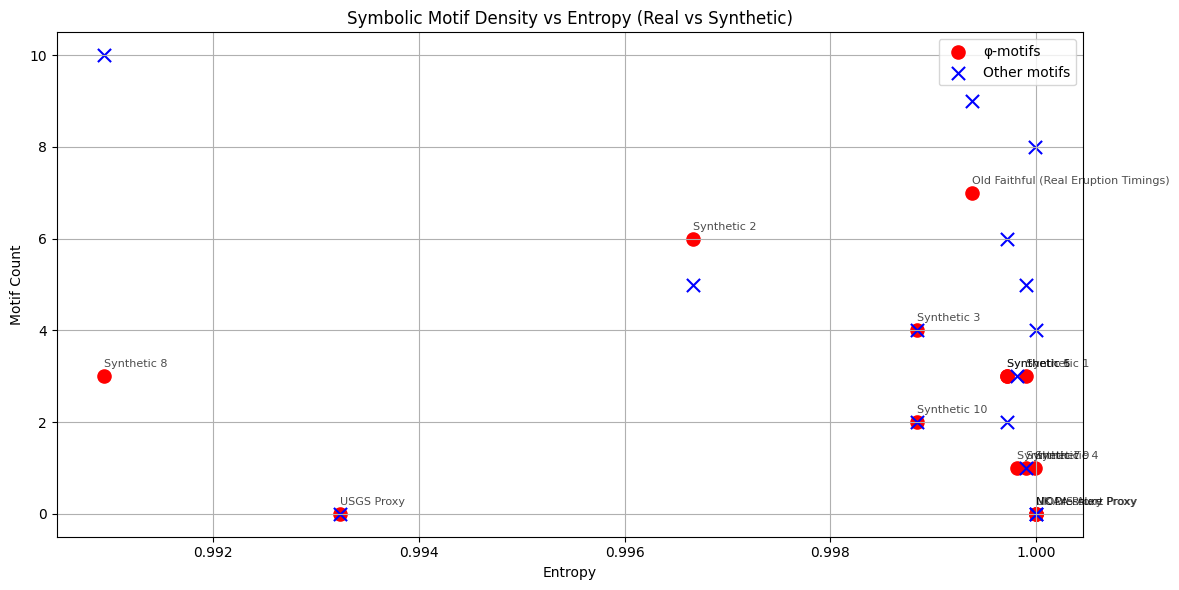

In [2]:
# 🌋 Symbolic Eruption Analysis — Bulletproof Colab Version
!pip install pandas numpy matplotlib scipy requests --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import os
from google.colab import files
from io import StringIO
import requests

# === Symbolic Utilities ===
def symbolic_entropy(series):
    counts = np.bincount(series)
    probs = counts / np.sum(counts)
    return -np.sum([p * np.log2(p) for p in probs if p > 0])

def entropy_curvature(signal, window=10):
    smoothed = gaussian_filter1d(signal.astype(float), sigma=1)
    diffs = np.gradient(smoothed)
    curvature = np.gradient(diffs)
    return np.mean(np.abs(curvature[-window:]))

def detect_multiple_motifs(bits, motifs):
    bit_str = ''.join(map(str, bits))
    return {
        motif: sum(1 for i in range(len(bit_str) - len(motif) + 1)
                   if bit_str[i:i+len(motif)] == motif)
        for motif in motifs
    }

def count_prime_intervals(bits, max_n=500):
    primes = set(n for n in range(2, max_n + 1)
                 if all(n % d != 0 for d in range(2, int(n**0.5) + 1)))
    return sum((i+1) in primes for i, b in enumerate(bits) if b == 1)

# === File Paths ===
synth_path = "synthetic_symbolic_eruption.csv"
real_path = "real_symbolic_eruption_all.csv"
motif_list = ["01001010", "00110011", "111000111", "10101010"]

# === Upload if files are missing ===
if not os.path.exists(synth_path):
    print("❗ synthetic_symbolic_eruption.csv not found. Please upload it.")
    uploaded = files.upload()
if not os.path.exists(real_path):
    print("❗ real_symbolic_eruption_all.csv not found. Please upload it.")
    uploaded = files.upload()

# === Load Data ===
df_synth = pd.read_csv(synth_path)
df_real = pd.read_csv(real_path)

df_synth["data_type"] = "synthetic"
df_real["data_type"] = "real"

# === Combine and Display ===
df_all = pd.concat([df_synth, df_real], ignore_index=True)

print("✅ Files loaded successfully.\n")
print(df_all.head())

# === Plot Symbolic Results ===
plt.figure(figsize=(12, 6))
plt.scatter(df_all["entropy"], df_all["φ_motifs"], c='red', label="φ-motifs", s=90)
plt.scatter(df_all["entropy"], df_all["alt_motifs_total"], c='blue', label="Other motifs", s=90, marker='x')
for i, row in df_all.iterrows():
    plt.text(row["entropy"], row["φ_motifs"]+0.2, row["event"], fontsize=8, alpha=0.7)
plt.xlabel("Entropy")
plt.ylabel("Motif Count")
plt.title("Symbolic Motif Density vs Entropy (Real vs Synthetic)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
